# 1. Load Data

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile

zf = zipfile.ZipFile('data/fifa19.zip') 
df = pd.read_csv(zf.open('data.csv'),
                index_col ='ID')

---
# 2. Clean Data

I assigned the ID column as index column as each player should have a unique ID

In [3]:
df.drop(columns = df.iloc[:, :1], inplace = True)
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2.1 Identify fields with null data

In [4]:
df.isnull().sum()

Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW            

In [5]:
#%timeit [x.strip('€') for x in df[['Value', 'Wage', 'Release Clause']]]

### 2.1.1 Handle null and/or invalid values in key fields:

In the dataset, I identified the value fields and normalized them as numeric data type.

In [6]:
df[['Value', 'Wage', 'Release Clause']].isnull().sum()

Value                0
Wage                 0
Release Clause    1564
dtype: int64

In [7]:
# Parse Value, Wage, Release Clause to make them numeric
#df['Value'] = [x[1:] for x in df['Value']] #remove currency unit
df['Value'] = df['Value'].str.strip('€')
df['Wage'] =  df['Wage'].str.strip('€')
df['Release Clause'] =  df['Release Clause'].str.strip('€')
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
ID,,,
158023,110.5M,565K,226.5M
20801,77M,405K,127.1M
190871,118.5M,290K,228.1M
193080,72M,260K,138.6M
192985,102M,355K,196.4M


In [8]:
def convert(val):
    lookup = {'K': 1_000, 'M': 1_0000_00, '0':1}
    if type(val) != float:
        unit = val[-1]
        if unit in lookup:
            number = pd.to_numeric(val[:-1])
        return lookup[unit] * number
    return val 

In [9]:
df['Release Clause'] = df['Release Clause'].apply(convert)

In [10]:
df['Value'] = df['Value'].apply(convert)
df['Wage'] = df['Wage'].apply(convert)

df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
ID,,,
158023,110500000.0,565000.0,226500000.0
20801,77000000.0,405000.0,127100000.0
190871,118500000.0,290000.0,228100000.0
193080,72000000.0,260000.0,138600000.0
192985,102000000.0,355000.0,196400000.0


In [11]:
# df['Release Clause'].loc[df['Release Clause'].isnull()]

Using the first 5 rows in the dataset, I looked at each column to find any obvious anomalies or unnecessary columns to reduce the data further (remove cols or rows)

Drop : Special, Real Face, Loaned From, <br>
Invalid values: Body Type

In [12]:
df.drop(columns = ['Special', 'Real Face', 'Loaned From'], inplace = True)
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [13]:
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
Name: Body Type, dtype: int64

In [14]:
df['Body Type'].loc[df['Body Type'].isin(['C. Ronaldo', 'Akinfenwa', 'Neymar','Shaqiri', 'PLAYER_BODY_TYPE_25', 'Courtois', 'Messi'])] = 'Not Available'
df['Body Type'].value_counts()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Normal           10595
Lean              6417
Stocky            1140
Not Available        7
Name: Body Type, dtype: int64

### 2.2 Cutting and Binning (Add columns for position grouping)

Values in the position field is too granular, so I decided to group them into 4 categories:

In [15]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [16]:
pos_dict = {
    'Goalkeeper': ['GK'],
    'Defender': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
    'Midfielder': ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 
                   'RCM', 'RM', 'LDM', 'CDM', 'RDM'],
    'Attacker': ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
}

df['Position'].head()

ID
158023     RF
20801      ST
190871     LW
193080     GK
192985    RCM
Name: Position, dtype: object

In [17]:
#Dropping rows with null Positions
df = df[df['Position'].notnull()]

In [18]:
def simplify_position(position):
    for key in pos_dict:
        if position in pos_dict[key]:
            return key
        else:
            continue
df['SimplifiedPosition']= df['Position'].apply(simplify_position)

In [19]:
df[['Position','SimplifiedPosition']].iloc[:10]

,Position,SimplifiedPosition
ID,,
158023,RF,Attacker
20801,ST,Attacker
190871,LW,Attacker
193080,GK,Goalkeeper
192985,RCM,Midfielder
183277,LF,Attacker
177003,RCM,Midfielder
176580,RS,Attacker
155862,RCB,Defender


In [20]:
df['SimplifiedPosition'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: SimplifiedPosition, dtype: int64

#### Age Grouping

In [21]:
age_bins = [15, 21, 25, 30, 35, 40, 45]
labels = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels = labels)
df['Age_Group'].value_counts()

26-30    5509
22-25    5328
16-21    4738
31-35    2281
36-40     282
41-45       9
Name: Age_Group, dtype: int64

### 2.3 Handle datetime columns

In [22]:
df[['Joined','Contract Valid Until']].head()

,Joined,Contract Valid Until
ID,,
158023,"Jul 1, 2004",2021
20801,"Jul 10, 2018",2022
190871,"Aug 3, 2017",2022
193080,"Jul 1, 2011",2020
192985,"Aug 30, 2015",2023


In [23]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [24]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

In [25]:
df[['Joined','Contract Valid Until']].head()

,Joined,Contract Valid Until
ID,,
158023,2004-07-01,2021-01-01
20801,2018-07-10,2022-01-01
190871,2017-08-03,2022-01-01
193080,2011-07-01,2020-01-01
192985,2015-08-30,2023-01-01


### 2.4 Handle duplicates

In [26]:
df[df.duplicated()]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,SimplifiedPosition,Age_Group
ID,,,,,,,,,,,,,,,,,,,,,


---
## 3. Visualize Data for insights

### Find Top 10 Highest Paid players

In [27]:
topwage= df[['Name','Value', 'Wage']].nlargest(10,'Wage', keep = 'first')
#df[['Name','Value', 'Wage']].sort_values(by = ['Wage'], ascending = False)
topwage = topwage.set_index('Name')
topwage

,Value,Wage
Name,,
L. Messi,110500000.0,565000.0
L. Suárez,80000000.0,455000.0
L. Modrić,67000000.0,420000.0
Cristiano Ronaldo,77000000.0,405000.0
Sergio Ramos,51000000.0,380000.0
K. De Bruyne,102000000.0,355000.0
T. Kroos,76500000.0,355000.0
G. Bale,60000000.0,355000.0
E. Hazard,93000000.0,340000.0


Text(0,0.5,'Wage')

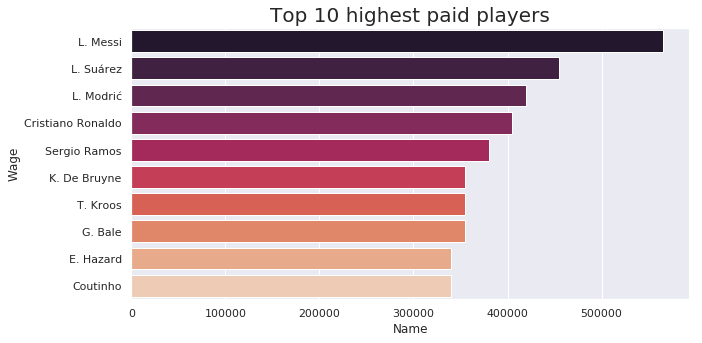

In [28]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = topwage['Wage'], y =topwage.index,  palette = 'rocket')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

### Find the relationship between Value and Wage of the players

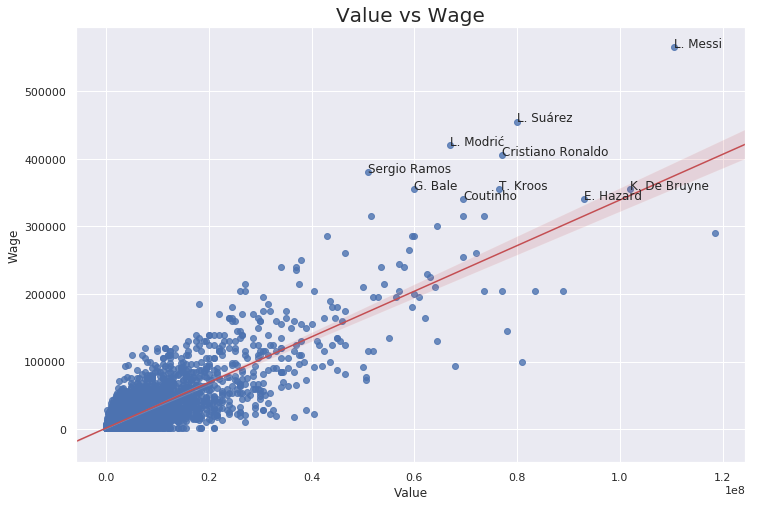

In [29]:
plt.figure(figsize=(12,8))
labels = topwage.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

# labeling the top 10 highest paid players
for i, label in enumerate(labels):
    ax.annotate(label, (topwage['Value'][i],topwage['Wage'][i]))

Text(0.5,1,'Value vs Overall')

<Figure size 1296x576 with 0 Axes>

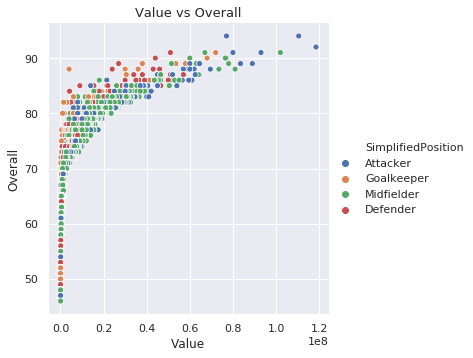

In [30]:
plt.figure(figsize=(18,8))
sns.relplot(x = 'Value', y = 'Overall' , hue='SimplifiedPosition', data=df)
plt.title('Value vs Overall', fontsize = 13)

### Find the top 10 most valuable nations

In [31]:
nation_value = df[['Value']].groupby(df['Nationality']).apply(np.sum)
top_nation_value = nation_value.nlargest(10,'Value', keep = 'first')
top_nation_value

,Value
Nationality,
Spain,4.706425e+09
Brazil,3.805425e+09
France,3.361980e+09
Germany,3.028910e+09
Argentina,2.882710e+09
England,2.489150e+09
Italy,2.138295e+09
Portugal,1.630500e+09
Netherlands,1.299630e+09


Text(0.5,1,'Top 10 nations with highest value of players')

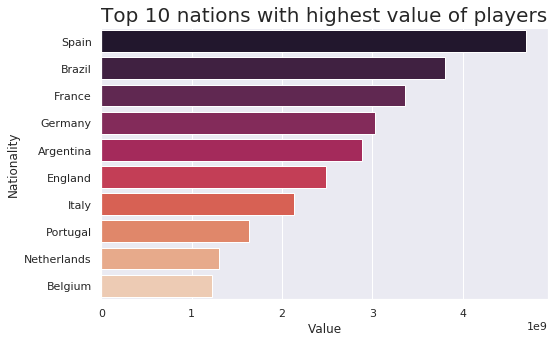

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'Value', y = top_nation_value.index, data = top_nation_value,  palette = 'rocket')
plt.title('Top 10 nations with highest value of players', fontsize = 20)

### Find the Top 10 most valuable clubs

In [33]:
club_value = df[['Value']].groupby(df['Club']).apply(np.sum)
top_club_value = club_value.nlargest(10,'Value', keep = 'first')
top_club_value

,Value
Club,
Real Madrid,874425000.0
FC Barcelona,852600000.0
Manchester City,786555000.0
Juventus,704475000.0
FC Bayern München,679025000.0
Atlético Madrid,644525000.0
Paris Saint-Germain,625325000.0
Tottenham Hotspur,618450000.0
Chelsea,606815000.0


Text(0.5,1,'Top 10 clubs with highest value of players')

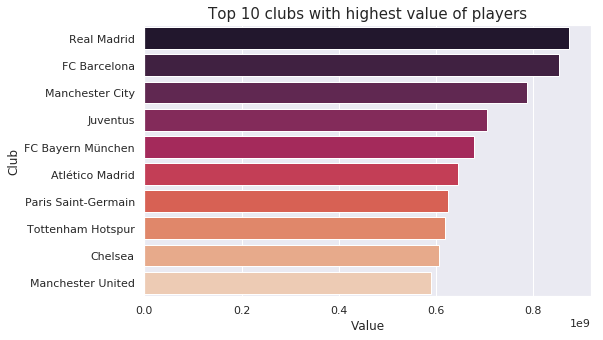

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'Value', y = top_club_value.index, data = top_club_value, palette = 'rocket')
plt.title('Top 10 clubs with highest value of players', fontsize = 15)

### Top 10 clubs with highest 90th percentile player value

In [35]:
# 90th percentile player value in each club
value_p90 = df[['Value']].groupby(df['Club']).quantile(0.9)
value_p90.rename({'Value': '90_val'}, axis=1, inplace=True)
#top10 club with highest 90th percentile player value
top_value_p90 = value_p90.nlargest(10, '90_val')
top_value_p90

0.9,90_val
Club,
Manchester City,59900000.0
Real Madrid,59900000.0
FC Barcelona,57800000.0
Paris Saint-Germain,55500000.0
Napoli,45900000.0
FC Bayern München,45600000.0
Juventus,45500000.0
Atlético Madrid,44800000.0
Liverpool,42900000.0


In [36]:
# Create new dataset with top 10 clubs with highest values on 90th percentile 
# and add original df columns to it
df2 = top_value_p90.merge(df[['Name', 'Value', 'Club']], left_on='Club', right_on='Club')
df2.head()

,Club,90_val,Name,Value
0,Manchester City,59900000.0,K. De Bruyne,102000000.0
1,Manchester City,59900000.0,David Silva,60000000.0
2,Manchester City,59900000.0,S. Agüero,64500000.0
3,Manchester City,59900000.0,L. Sané,61000000.0
4,Manchester City,59900000.0,Bernardo Silva,59500000.0


In [37]:
#Group per club and find the # of players with value >= 90th percentile of each club
df2_90 = df2.loc[df2['Value']>= df2['90_val']]
top_df2_90 = df2_90.groupby(by = ['Club', '90_val'])[['90_val']].count()
top_df2_90.rename({'90_val': 'Count'}, axis=1, inplace=True)
top_df2_90.head()

,,Count
Club,90_val,
Atlético Madrid,44800000.0,4
FC Barcelona,57800000.0,4
FC Bayern München,45600000.0,3
Juventus,45500000.0,3
Liverpool,42900000.0,4


In [38]:
top_df2_90.reset_index(inplace= True)

In [39]:
top_df2_90 = top_df2_90.nlargest(10, '90_val')
top_df2_90

,Club,90_val,Count
5,Manchester City,59900000.0,4
9,Real Madrid,59900000.0,4
1,FC Barcelona,57800000.0,4
8,Paris Saint-Germain,55500000.0,3
7,Napoli,45900000.0,3
2,FC Bayern München,45600000.0,3
3,Juventus,45500000.0,3
0,Atlético Madrid,44800000.0,4
4,Liverpool,42900000.0,4
6,Manchester United,41500000.0,4


In [40]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


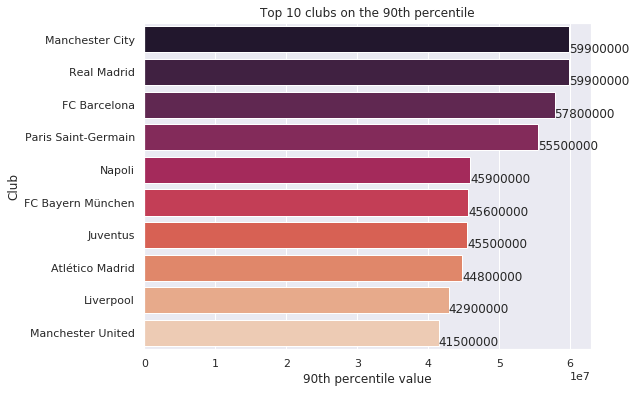

In [41]:
        
plt.figure(figsize=(8,6))
ax = sns.barplot(x= '90_val', y = 'Club', data = top_df2_90, palette = 'rocket')
plt.title('Top 10 clubs on the 90th percentile')
plt.xlabel('90th percentile value')        
show_values_on_bars(ax,"h", 0.3)

In [42]:
#df[['Age','Age_Group', 'Nationality']].mean()
df_age = df[['Age']].groupby(df['Club']).apply(np.mean)
df_age = df_age.loc[df_age.index.isin(top_club_value.index)].sort_values('Age', ascending = False)
df_age

,Age
Club,
Juventus,27.160000
Chelsea,25.212121
Manchester United,24.757576
Tottenham Hotspur,24.606061
Paris Saint-Germain,24.566667
FC Bayern München,24.310345
Real Madrid,24.030303
Manchester City,23.909091
FC Barcelona,23.848485


Text(0.5,1,'Average Age of Players in Top 10 Most Valuable Clubs')

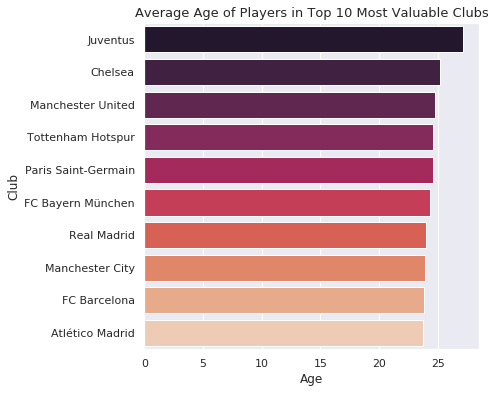

In [43]:
plt.figure(figsize=(6,6))
#labels = topwage.index
ax = sns.barplot(x = 'Age', y = df_age.index , data = df_age,  palette = 'rocket')
plt.title('Average Age of Players in Top 10 Most Valuable Clubs', fontsize = 13)

Juventus may have very valuable players at the moment, but the average age of the team is getting older and will need some fresh faces soon to cope with the demands in the league.

### Top 10 Players with the highest Growth Potential
Growth potential can be defined as Potential - Overall. 

In [44]:
df['Growth Potential'] = df['Potential'] - df['Overall']

# Top 10 players with highest growth potential where potential > 90
top_potential = df[['Name', 'Age', 'Wage', 'SimplifiedPosition', 
    'Club','Growth Potential', 'Potential', 
    'Overall']].loc[df['Potential']>90].nlargest(10, 'Growth Potential', keep = 'first')
top_potential

,Name,Age,Wage,SimplifiedPosition,Club,Growth Potential,Potential,Overall
ID,,,,,,,,
238794,Vinícius Júnior,17,66000.0,Attacker,Real Madrid,15,92,77
230621,G. Donnarumma,19,23000.0,Goalkeeper,Milan,11,93,82
231443,O. Dembélé,21,155000.0,Attacker,FC Barcelona,9,92,83
230666,Gabriel Jesus,21,130000.0,Attacker,Manchester City,9,92,83
235243,M. de Ligt,18,11000.0,Defender,Ajax,9,91,82
206585,Kepa,23,84000.0,Goalkeeper,Chelsea,8,91,83
231747,K. Mbappé,19,100000.0,Midfielder,Paris Saint-Germain,7,95,88
232363,M. Škriniar,23,82000.0,Defender,Inter,7,92,85
220834,Marco Asensio,22,215000.0,Attacker,Real Madrid,7,92,85


Text(0.5,1,'Top 10 Players with highest Growth Potential (>90 Potential)')

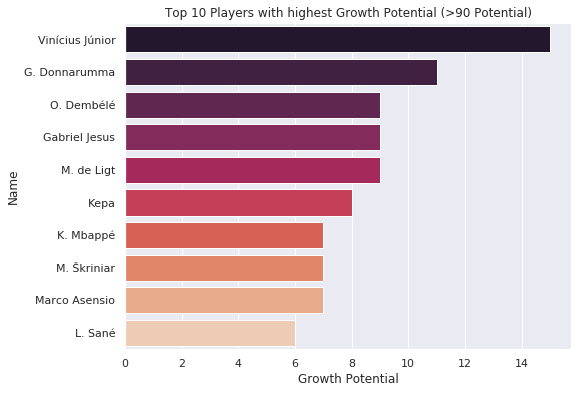

In [45]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Growth Potential', y = 'Name', data = top_potential, palette = 'rocket')
plt.title('Top 10 Players with highest Growth Potential (>90 Potential)')

### Create a Radar Chart showcasing player attributes
I will be comparing the top 2 players with the highest overall: Lionel Messi vs Cristiano Ronaldo

How to create a Radar chart using matplot lib: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

In [46]:
top2 = df.nlargest(2, 'Overall')
top2.set_index('Name', inplace = True)
top2

,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,SimplifiedPosition,Age_Group,Growth Potential
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,...,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,Attacker,31-35,0
Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,...,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,Attacker,31-35,0


In [47]:
# Identify the key attributes best related to Attacker for radar chart
labels = ['Finishing', 'HeadingAccuracy',
       'Dribbling', 'BallControl','Acceleration', 'ShotPower']
top2_data = top2[labels]
top2_data

,Finishing,HeadingAccuracy,Dribbling,BallControl,Acceleration,ShotPower
Name,,,,,,
L. Messi,95.0,70.0,97.0,96.0,91.0,85.0
Cristiano Ronaldo,94.0,89.0,88.0,94.0,89.0,95.0


In [48]:
stats = top2_data.values
stats

array([[95., 70., 97., 96., 91., 85.],
       [94., 89., 88., 94., 89., 95.]])

In [49]:
#And here we need to use the np.concatenate to draw a closed plot in radar chart.
#Add the 1st datapoint to the last 
stats_series1=np.concatenate((stats[0],[stats[0][0]]))
stats_series2=np.concatenate((stats[1],[stats[1][0]]))
print (stats_series1)
print (stats_series2)

[95. 70. 97. 96. 91. 85. 95.]
[94. 89. 88. 94. 89. 95. 94.]


In [50]:
#Set the angle of polar axis and close the plot
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
angles

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

<Figure size 432x288 with 0 Axes>

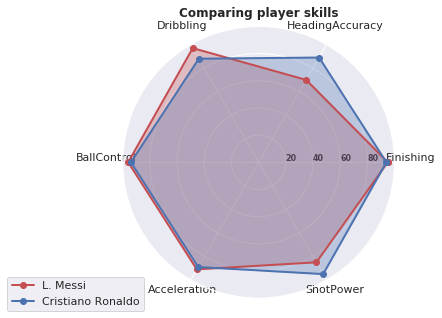

In [51]:
# Clear the plot to start with a blank canvas.
plt.clf()
fig=plt.figure(figsize=(5,5))

# Initialise the spider plot
ax = fig.add_subplot(111, polar=True)

# Draw one axe per variable + adjust the labels positioning
plt.xticks(angles[:-1], labels,horizontalalignment='center', 
            verticalalignment='bottom')

# Draw ylabels    
ax.set_rlabel_position(0)
plt.yticks(  [20, 40, 60, 80],
   ['20', '40', '60', '80'], color= 'k', size=8, weight = 'bold')
plt.ylim(0,100)

#Set title and theta grids
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Comparing player skills', weight='bold', fontsize = 12,
              horizontalalignment='center', 
              verticalalignment='top')

#Plot series 1
ax.plot(angles, stats_series1, 'o-', linewidth=2, color = 'r', label=top2_data.index[0])
ax.fill(angles, stats_series1, alpha=0.3, color = 'r')

#Plot series 2
ax.plot(angles, stats_series2, 'o-', linewidth=2, color = 'b', label=top2_data.index[1])
ax.fill(angles, stats_series2, alpha=0.3, color = 'b')

ax.grid(True)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#### Recreate same radar chart with a function (more concise)

In [52]:
# Rewritting in function:
def plot_radar(name_list, features):
    N = len(features) 
    
    # Assign series colors, title here
    series_color = ['r', 'b', 'g', 'y', 'o'] 
    ### just in case you have more than 2 series to compare, 
    ### scrappy way of listing series colors, need a more dynamic approach
    text = 'Comparing Player Skills'
     
    # Clear the plot to start with a blank canvas.
    plt.clf()
    fig=plt.figure(figsize=(5,5))

    # Initialise the spider plot
    ax = fig.add_subplot(111, polar=True)
    
    # Loop through the name list
    for idx, name in enumerate(name_list,0):
    #Set the angle of polar axis and close the plot
        angles=np.linspace(0, 2*np.pi, N, endpoint=False)
        angles=np.concatenate((angles,[angles[0]]))
        
        #Define the stats for each series and close the plot in radar chart.
        stats = df[labels].loc[df['Name']==name]
        stats = stats.values
        stats = np.concatenate((stats[0],[stats[0][0]]))
        #Plot series 1,2,3,4....:
        ax.plot(angles, stats, 'o-', 
                linewidth=2, color = series_color[idx], 
                label=name)  #label here is to populate the legend key 
        ax.fill(angles, stats, alpha=0.3, 
                color =  series_color[idx])
        idx+=1

### Plot formatting    
    # Draw one axe per variable + adjust the labels positioning
    plt.xticks(angles[:-1], labels,horizontalalignment='center', 
                verticalalignment='bottom')

    # Draw ylabels    
    ax.set_rlabel_position(0)
    plt.yticks(  [20, 40, 60, 80],
       ['20', '40', '60', '80'], color= 'k', size=8, weight = 'bold')
    plt.ylim(0,100)

    #Set title and theta grids
    ax.set_thetagrids(angles * 180/np.pi, features)
    ax.set_title(text, weight='bold', fontsize = 12,
                  horizontalalignment='center', 
                  verticalalignment='top')
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    

    return   

<Figure size 432x288 with 0 Axes>

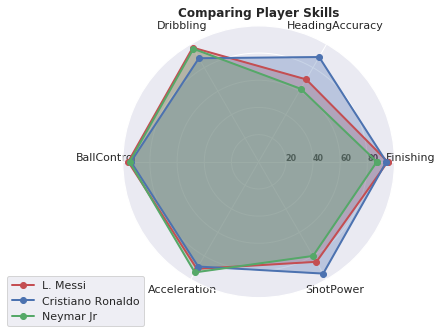

In [53]:
labels = ['Finishing', 'HeadingAccuracy',
       'Dribbling', 'BallControl','Acceleration', 'ShotPower']
plot_radar(['L. Messi', 'Cristiano Ronaldo','Neymar Jr'], labels)

### Create a correlation heatmap of the most important skills for players:

Create a heatmap:
https://python-graph-gallery.com/91-customize-seaborn-heatmap/

Customize heatmap formats:
http://python-graph-gallery.com/90-heatmaps-with-various-input-format/

Choosing colormaps:
https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

#### Correlation Matrix heatmap
The top left quadrant of the heatmap is mostly shaded in darker shades of blue, indicating high correlation among attributes. 

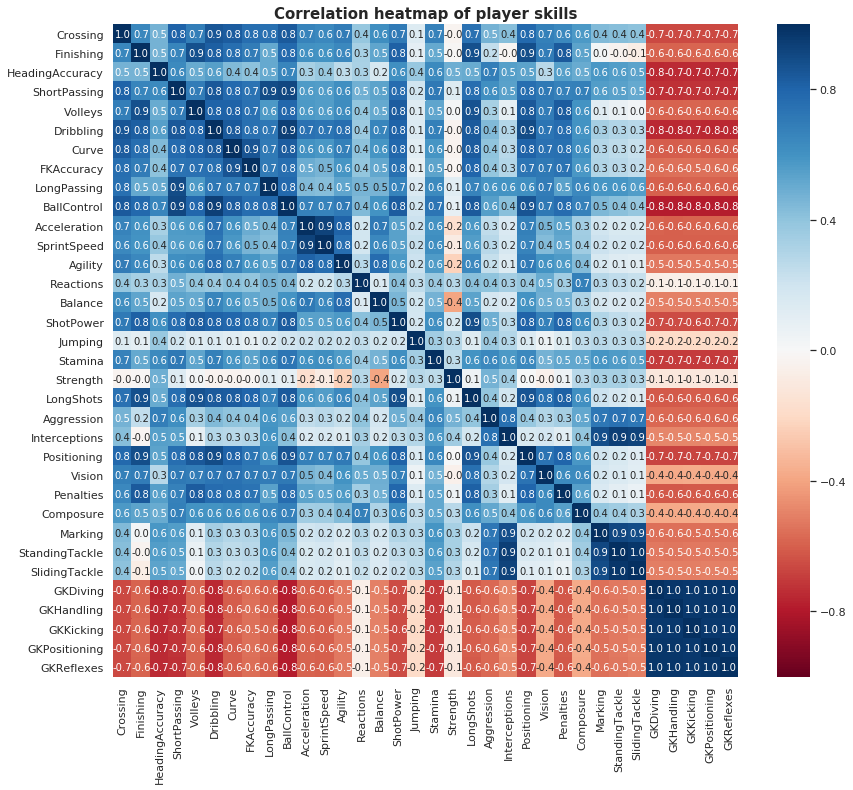

In [54]:
# Calculate correlation between each pair of variable
corr_matrix=df.iloc[:, 49:83].corr()
# plot it
plt.figure(figsize= (14,12))
plt.title('Correlation heatmap of player skills', fontsize = 15, weight = 'bold')
sns.heatmap(corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt = '.1f', 
            annot_kws={"size": 10})

#### Clustermap - Skills by position
The clustermap shows a more defined correlation among the attributes and also the relationship between positions compared to using a heatmap. Both attackers and midfielders share some similarities while the goalkeepers and defenders share a cluster of attributes based on the color clusters. 

It is safe to say that each position has its own core cluster of skills that are considered important based on the clustermap. Goalkeepers (GK) have their own attributes with 'GK' prefixes. 

In [55]:
# Calculate correlation between each pair of variable
#corr_matrix=df.iloc[:, 49:78][df['SimplifiedPosition']=='Attacker'].corr()
df_skills =df.iloc[:, 49:83].groupby(df['SimplifiedPosition']).apply(np.mean).T

# 90th percentile player value in each club
df_skills90 = df.iloc[:, 49:83].groupby(df['SimplifiedPosition']).quantile(0.9).T
#value_p90.rename({'Value': '90_val'}, axis=1, inplace=True)

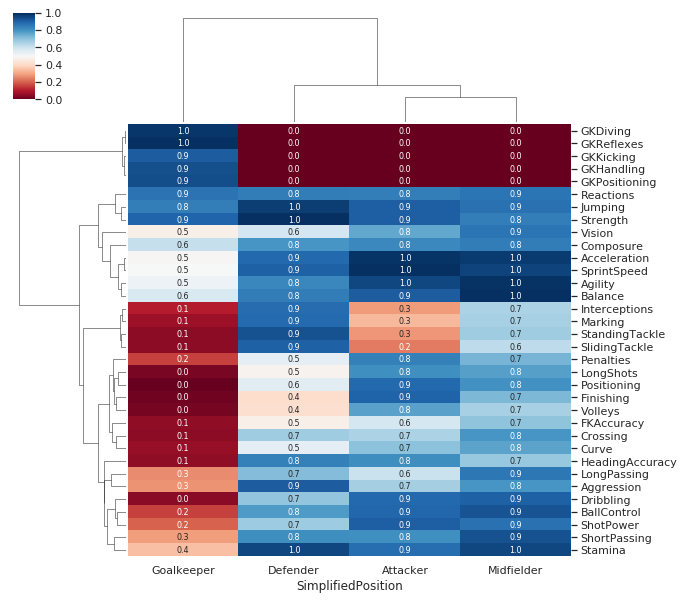

In [56]:
# Cluster heatmap on skills by position
sns.clustermap(df_skills, cmap='RdBu', standard_scale= 1,
               annot=True, fmt = '.1f', 
               annot_kws={"size": 8})


#### Heatmap  - Skills by position
The heatmap compares mean attributes vs 90th percentile attributes of each position. 

It is observed that the attackers and midfielders share similar key attributes as most of the "hot zones" (dark blue shades) are quite similar in both heatmaps. 

Top defenders are more well-rounded compared to general defenders especially in the dribbling, curve, ballcontrol section, which are significantly higher in the 90th percentile heatmap. 


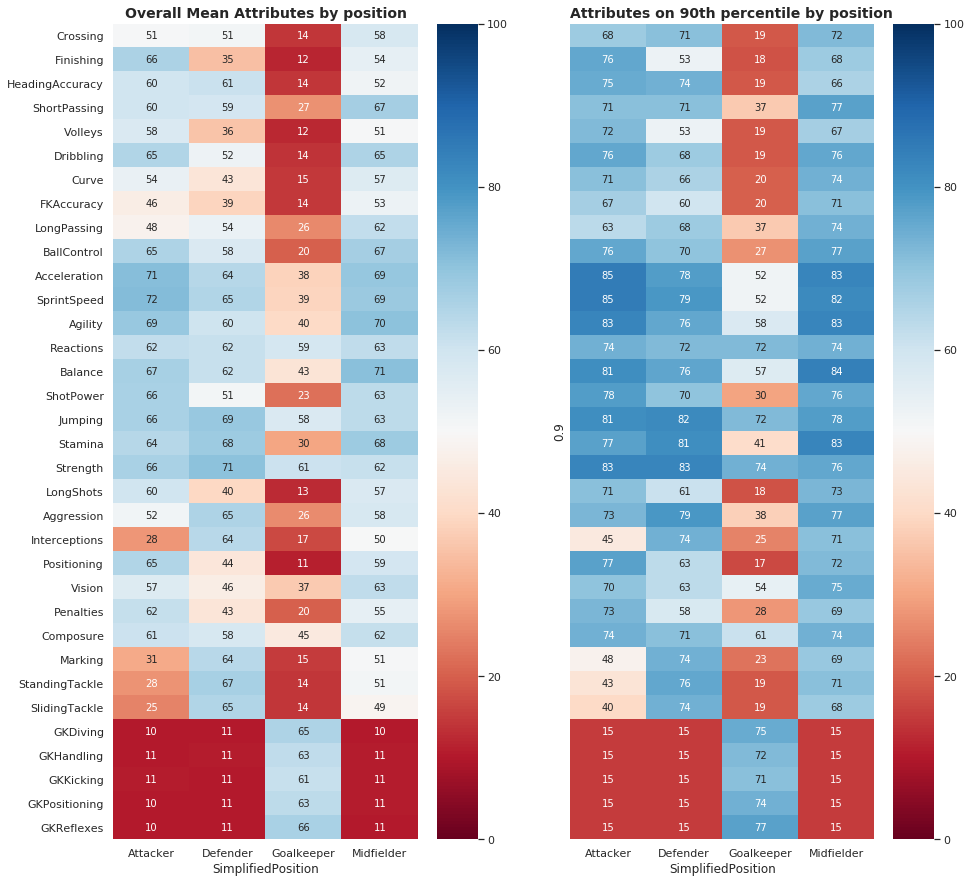

In [57]:
fig = plt.figure(figsize = (15,15))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(1,2,1)

plt.title('Overall Mean Attributes by position', fontsize=14, fontweight='bold')

#cbar_kws = {'orientation':"vertical", 'pad':0.05, 'aspect':50}
sns.heatmap(df_skills, cmap='RdBu',
            vmin=0, vmax=100, 
            #cbar_kws=cbar_kws,
            annot=True, annot_kws={"size": 10}
           )
# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(1,2,2)

plt.title('Attributes on 90th percentile by position', loc= 'left', fontsize=14, fontweight='bold')

#cbar_kws = {'orientation':"vertical", 'pad':0.05, 'aspect':50}
sns.heatmap(df_skills90, cmap='RdBu', yticklabels = False,
            vmin = 0, vmax = 100,
            #cbar_kws=cbar_kws,
            annot=True, annot_kws={"size": 10}
           )

---
## 4. Machine Learning & Predictions
### 4.1 Predict player's overall value using regression model
Based on earlier heatmap and clustermap, it is safe to say that GK attributes are significantly different than the other positions. In order to predict player's overall value based on a list of key skills, I have decided to remove GK skills and players in that position.

In [58]:
df_noGK = df[df['SimplifiedPosition'] !='Goalkeeper']

variables = df_noGK.iloc[:, 49:78].columns
x = df_noGK[variables].values
x

array([[84., 95., 70., ..., 33., 28., 26.],
       [84., 94., 89., ..., 28., 31., 23.],
       [79., 87., 62., ..., 27., 24., 33.],
       ...,
       [25., 40., 46., ..., 32., 13., 11.],
       [44., 50., 39., ..., 20., 25., 27.],
       [41., 34., 46., ..., 40., 43., 50.]])

In [59]:
target = df_noGK['Overall']
y = target.values
y

array([94, 94, 92, ..., 47, 47, 46])

In [60]:
from sklearn.model_selection import train_test_split

# 80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(12897, 29) (12897,)
(3225, 29) (3225,)


In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lr.predict(x_test)
print (y_pred)
print ('MAE: {}'.format(mean_absolute_error(y_test,y_pred)))
print ('R2 score: {}'.format(r2_score(y_test, y_pred))) #Variance

[59.66231071 62.68719446 65.56685296 ... 67.41415685 60.96510478
 55.00914243]
MAE: 1.9653411858391725
R2 score: 0.8622742202148117


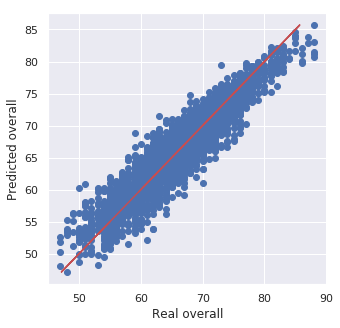

In [63]:
plt.figure(figsize = (5,5))
plt.xlabel ('Real overall')
plt.ylabel('Predicted overall')
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred, color = 'r')

# The closer the blue dots are to the red line, the better the prediction is.
# Overall the blue dots are hugging the red line, which means the regression model is a suitable model 
# to predict player's overall rating especially given that the MAE and R2 score are small. 

In [64]:
results = pd.DataFrame({
    'Real overall': y_test,
    'Predicted overall': y_pred,
    'Difference': np.abs(y_test - y_pred)
})
results.head()

,Real overall,Predicted overall,Difference
0,53,59.662311,6.662311
1,60,62.687194,2.687194
2,66,65.566853,0.433147
3,75,73.693806,1.306194
4,76,72.925368,3.074632


In [65]:
coef = pd.DataFrame(data = lr.coef_, index = variables, columns = ['Coef'])
#coef[0].column = 'Coef'
coef.nlargest(10, 'Coef')

,Coef
Reactions,0.271902
BallControl,0.158447
Composure,0.143764
ShortPassing,0.105328
HeadingAccuracy,0.085379
Acceleration,0.044544
Strength,0.041280
Marking,0.032787
Finishing,0.031750
SprintSpeed,0.031161


#### 4.1.1 Coefficient findings from linear regression fitting:
The most relevant variables (skills) to predict a player's overall score include: Reactions, BallControl, Composure and Shortpassing.

The scope of the regression model can be further tailored according to player's positions to better predict the player's value as each position does have its core of skills that are considered important to be a top player in the specific position. (as proven in the cluster map)

---
### 4.2 Random Forest and Features Importance


In [66]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor. 
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [67]:
y_pred = rf.predict(x_test)
print (y_pred)
print ('MAE: {}'.format(mean_absolute_error(y_test,y_pred)))
print ('R2 score: {}'.format(r2_score(y_test, y_pred))) #Variance

[56.28 61.28 67.23 ... 70.18 61.39 55.22]
MAE: 1.0145581395348837
R2 score: 0.9598580170182159


#### Feature importance
It's not normally enough to just to know that a model can make accurate predictions - we also want to know how it's making predictions. The most important way to see this is with feature importance.


In [68]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Skills':variables, 'Importance':m.feature_importances_}
                       ).sort_values('Importance', ascending=False)

fi = rf_feat_importance(rf, x_train); fi[:10]

,Skills,Importance
13,Reactions,0.664639
9,BallControl,0.108583
27,StandingTackle,0.078980
25,Composure,0.015657
2,HeadingAccuracy,0.013991
22,Positioning,0.013136
26,Marking,0.011733
21,Interceptions,0.010262
17,Stamina,0.007498
0,Crossing,0.007423


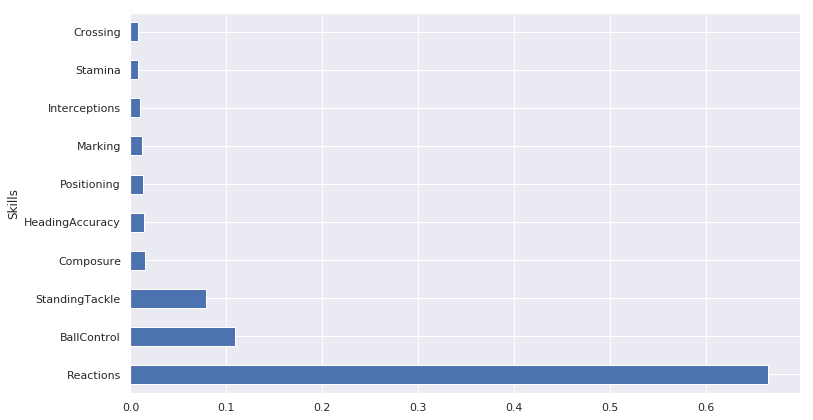

In [69]:
def plot_fi(fi): 
    return fi.plot('Skills', 'Importance', 'barh', figsize=(12,7), legend=False, color = 'b')

plot_fi(fi.nlargest(10, 'Importance'))

From the random forest regression model, the top 10 skills relevant to a player's overall rating differs slightly from the Linear Regression model (notably the standing tackle attribute). The MAE and R2 Score for the random forest model are also more accurate (lower MAE and higher R2 score), which leads me to believe this is a more general/better (not overfitting or underfitting) model to predict player's overall rating.